# Proyecto

# Oscilador Paramétrico

In [1]:
using PyPlot

In [2]:
include("TaylorDiff.jl")
using ATaylor

**Con el método de Taylor**

In [14]:
#método con dos ecuaciones para las funciones del ejercicio 1, con codicion inicial x0 para f y y0 para g
function coefTaylor(f,g,x0,y0,t0,N)
    t=taylor([t0],N)
    x=taylor([x0],N)
    y=taylor([y0],N)
    for n in 1:N
        q=f(t,x,y)#modificación 
        w=g(t,x,y)#modificación
        a=taylor(q.v,n+1)
        b=taylor(w.v,n+1)
        x.v[n+1]=a.v[n]/n
        y.v[n+1]=b.v[n]/n
    end
    return Taylor(x.v),Taylor(y.v)
end 
function pasointh(x,y,ϵ)
    fh=(ϵ/abs(x.v[end]))^(1/(length(x.v)-1))
    fl=(ϵ/abs(x.v[end-2]))^(1/(length(x.v)-3))
    gh=(ϵ/abs(y.v[end]))^(1/(length(y.v)-1))
    gl=(ϵ/abs(y.v[end-2]))^(1/(length(y.v)-3))
    return min(fh,fl,gh,gl)
end
function solecuacion(f,g,x0,y0,ϵ,N,tf)
    M=300000 #número máximo de elementos para los vectores
    a=zeros(eltype(x0), M)
    da=zeros(eltype(x0), M)
    s1=zeros(eltype(x0), M)
    s2=zeros(eltype(x0), M)
    t=zeros(eltype(x0), M)
    s1[1]=x0
    a[1]=x0
    s2[1]=y0
    da[1]=y0
    i=2
    while i<=M && t[i-1]<=tf
        x,y=coefTaylor(f,g,x0,y0,t[i],N)
        h=pasointh(x,y,ϵ)
        x0=Horner(h,x,x.n+1)
        y0=Horner(h,y,y.n+1)
        s1[i]=x0
        s2[i]=y0
        t[i]=t[i-1]+h
        a[i]=(2.0)*cos(t[i]*sqrt(2))
        da[i]=-(2.0)*sqrt(2)*sin(t[i]*sqrt(2))
        i+=1
    end
    t=Taylor(t);s1=Taylor(s1);s2=Taylor(s2);a=Taylor(a);da=Taylor(da)
    return t.v,s1.v,s2.v,a.v,da.v
end

solecuacion (generic function with 1 method)

In [15]:
f(t,x,y)=y #primera derivada de x
g(t,x,y)=-(α+β*cos(t))*sin(x) #segunda derivada de x
α=1.0
β=1.0
x0=0.0
y0=1.0
N=25
ϵ=1e-34
t0=0.0
tf=300.0
t,s1,s2,a,da = solecuacion(f,g,x0,y0,ϵ,N,tf)
figure(figsize=(6,4)) # este comando define el tamaño de la figura
plot(t,s2,",")    # este comando pinta la función f'(x); 
title(L"Gráfica 1. Espacio fase $\dot{x}(t)$ contra $x(t)$", fontsize=10)
xlabel(L"valores de $x$")
ylabel(L"valores de $\dot{x}$")
grid() 

LoadError: InexactError()

In [5]:
yT=taylor([1,1/1,2],1)
#xT=Taylor([x0],0)

ATaylor.Taylor{Float64}([1.0,1.0],2)

In [6]:
α=1.0
β=100.0
x0=0.0
y0=1.0
N=25
ϵ=1e-34
tf=300
t,s1A,s2A,a,da=solecuacion(f,g,x0,y0,ϵ,N,tf)
figure(figsize=(6,4)) # este comando define el tamaño de la figura
#x = linspace(0.8, 6.2, 100)
plot(s1,s2,",")    # este comando pinta la función f'(x); 
title(L"Gráfica 1. Espacio fase $\dot{x}(t)$ contra $x(t)$", fontsize=10)
xlabel(L"valores de $x$")
ylabel(L"valores de $\dot{x}$")
grid() 

LoadError: MethodError: no method matching coefTaylor(::#f, ::#g, ::Float64, ::Float64, ::Int64)[0m
Closest candidates are:
  coefTaylor(::Any, ::Any, ::Any, ::Any, ::Any, [1m[31m::Any[0m) at In[3]:3[0m

In [7]:
function coefTaylor(f,g,x0,y0,t0,N)
    t=taylor([t0],N)
    x=taylor([x0],N)
    y=taylor([y0],N)
    for n in 1:N
        q=f(t,x,y)#modificación 
        w=g(t,x,y)#modificación
        a=taylor(q.v,n+1)
        b=taylor(w.v,n+1)
        x.v[n+1]=a.v[n]/n
        y.v[n+1]=b.v[n]/n
    end
    return Taylor(x.v),Taylor(y.v)
end

coefTaylor (generic function with 1 method)

In [8]:
eq1(t,x,y)=y #primera derivada de x
eq2(t,x,y)=-(α+β*cos(t))*sin(x) #segunda derivada de x
α=1.0
β=1.0
x0=0.0
t0=0.0
y0=1.0
N=25
coefTaylor(f,g,x0,y0,t0,N)

LoadError: InexactError()

In [9]:
using Distributions


In [10]:
###################
##  Create Data  ##
###################
n = 100
x = linspace(-3, 3, n)
y = linspace(-3,3,n)

xgrid = repmat(x',n,1)
ygrid = repmat(y,1,n)

z = zeros(n,n)

for i in 1:n
    for j in 1:n
        z[i:i,j:j] = pdf(MvNormal(eye(2)),[x[i];y[j]])
    end
end

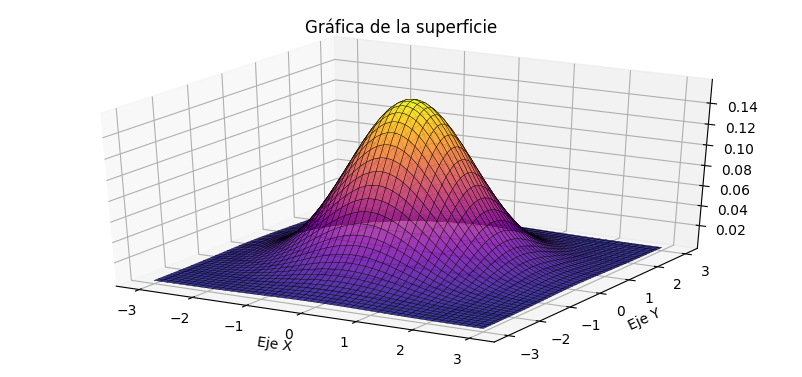

PyObject <matplotlib.text.Text object at 0x7f226ffa6ac8>

In [11]:

############
##  Plot  ##
############
fig = figure("pyplot_surfaceplot",figsize=(10,10))
ax = fig[:add_subplot](2,1,1, projection = "3d")
ax[:plot_surface](xgrid, ygrid, z, rstride=2,edgecolors="k", cstride=2, cmap=ColorMap("plasma"), alpha=0.8, linewidth=0.25)
xlabel("Eje X")
ylabel("Eje Y")
title("Gráfica de la superficie")
#=
subplot(212)
ax = fig[:add_subplot](2,1,2)
cp = ax[:contour](xgrid, ygrid, z, colors="black", linewidth=2.0)
ax[:clabel](cp, inline=1, fontsize=10)
xlabel("X")
ylabel("Y")
title("Contour Plot")
tight_layout()=#

In [12]:
pdf(MvNormal(eye(2)),[1;1])

0.05854983152431917

In [13]:
α β

LoadError: syntax: extra token "β" after end of expression